In [ ]:
import pandas as pd
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

pima = pd.read_csv("diabetes.csv", header=None, names=col_names)



In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.dropna(inplace = True)
pima.head()

dsmean = pima['Pregnancies'].mean()

for x in pima.index:
  if pima.loc[x, "Pregnancies"] == 0:
    pima.loc[x, "Pregnancies"] = dsmean


In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148,72,35,0,33.6,0.627,50,1
1,1.000000,85,66,29,0,26.6,0.351,31,0
2,8.000000,183,64,0,0,23.3,0.672,32,1
3,1.000000,89,66,23,94,28.1,0.167,21,0
4,3.845052,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI',  'Age', 'Glucose', 'BloodPressure','DiabetesPedigreeFunction']

X = pima[feature_cols]

y = pima.Outcome

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=16)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[179,  20],
       [ 50,  59]])

Text(0.5, 427.9555555555555, 'Predicted label')

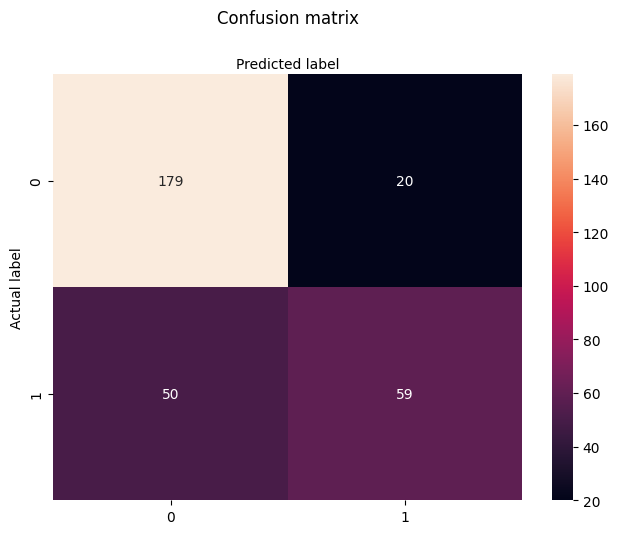

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.78      0.90      0.84       199
   with diabetes       0.75      0.54      0.63       109

        accuracy                           0.77       308
       macro avg       0.76      0.72      0.73       308
    weighted avg       0.77      0.77      0.76       308

